# Übung -STdWZM- Lagesollwertbildung

In [1]:
# benötigte Bibliotheken importieren
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
import numpy.matlib as ml
import collections
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import HTML
# Font anpassen
font = {'size'   : 15}
plt.rc('font', **font)

# Aufgabe 1

Zeichnen Sie qualitativ die Ruck-, Geschwindigkeits- und Wegverläufe zu den gegebenen Beschleunigungsprofilen.
# Lösung
# a) 

[]

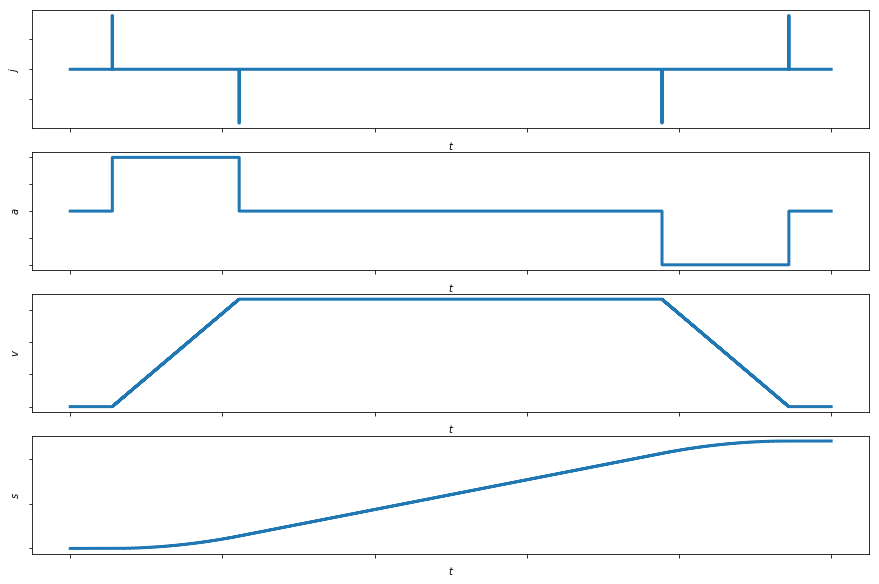

In [2]:
# Abschnitte definieren
stages = 18;
# Schritte pro Abschnitt
steps = 200;
# Array mit Zeitschritten erstellen
t = np.linspace(0,1,num=(steps*stages))
# delta-t bestimmen
delta = t[1]-t[0];
# 1. Bereich, 1 Abschnitt 
t1 = np.linspace(0,0,num=steps)
# 2. Bereich, 3 Abschnitte
t2 = np.linspace(1,1,num=3*steps)
# 3. Bereich, 10 Abschnitte
t3 = np.linspace(0,0,num=10*steps)
# 4. Bereich, 3 Abschnitte
t4 = np.linspace(-1,-1,num=3*steps)
# 5. Bereich, 1 Abschnitt
t5 = np.linspace(0,0,num=steps)
# Beschleunigungssignal zusammenbauen
a1=np.concatenate([t1,t2,t3,t4,t5])
# Ruck durch Differenzieren der Beschleunigung bestimmen
j1 = np.gradient(a1,t)
# Geschwindigkeit durch Integration der Beschleunigung bestimmen
v1 = np.cumsum(a1)*delta
# Position durch Integration der Geschwindigkeit bestimmen
p1 = np.cumsum(v1)*delta
# Ergebnisse plotten
plt.rcParams['figure.figsize'] = (15,10)
# Ruck
ax = plt.subplot(411)
plt.step(t,j1,linewidth=3.0)
ax.set(xlabel=r'$t$', ylabel=r'$j$')
ax.set_yticklabels([])
ax.set_xticklabels([])
# Beschleunigung
ax = plt.subplot(412)
plt.step(t,a1,linewidth=3.0)
ax.set(xlabel=r'$t$', ylabel=r'$a$')
ax.set_yticklabels([])
ax.set_xticklabels([])
# Geschwindigkeit
ax = plt.subplot(413)
plt.step(t,v1,linewidth=3.0)
ax.set(xlabel=r'$t$', ylabel=r'$v$')
ax.set_yticklabels([])
ax.set_xticklabels([])
# Position
ax = plt.subplot(414)
plt.step(t,p1,linewidth=3.0)
ax.set(xlabel=r'$t$', ylabel=r'$s$')
ax.set_yticklabels([])
ax.set_xticklabels([])

# b)

[]

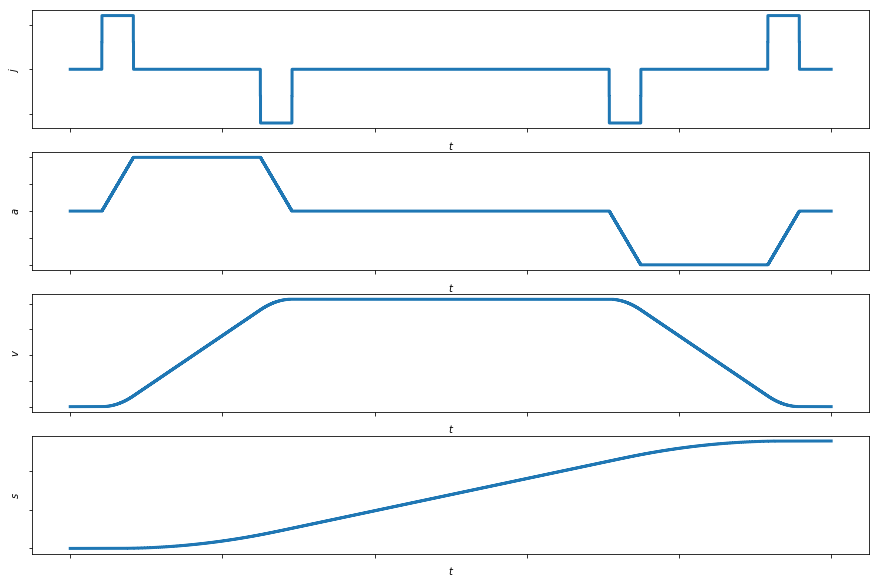

In [3]:
# Abschnitte definieren
stages = 24;
# Schritte pro Abschnitt
steps = 200;
# Array mit Zeitschritten erstellen
t = np.linspace(0,1,num=(steps*stages))
# delta-t bestimmen
delta = t[1]-t[0];
# 1. Bereich, 1 Abschnitt 
t1 = np.linspace(0,0,num=steps)
# 2. Bereich, 1 Abschnitt 
t2 = np.linspace(0,1,num=steps)
# 3. Bereich, 4 Abschnitt 
t3 = np.linspace(1,1,num=4*steps)
# 4. Bereich, 1 Abschnitt 
t4 = np.linspace(1,0,num=steps)
# 5. Bereich, 10 Abschnitt 
t5 = np.linspace(0,0,num=10*steps)
# 6. Bereich, 1 Abschnitt 
t6 = np.linspace(0,-1,num=steps)
# 7. Bereich, 4 Abschnitt 
t7 = np.linspace(-1,-1,num=4*steps)
# 8. Bereich, 1 Abschnitt 
t8 = np.linspace(-1,0,num=steps)
# 9. Bereich, 1 Abschnitt 
t9 = np.linspace(0,0,num=steps)
# Beschleunigungssignal zusammenbauen
a1=np.concatenate([t1,t2,t3,t4,t5,t6,t7,t8,t9])
# Ruck durch Differenzieren der Beschleunigung bestimmen
j1 = np.gradient(a1,t)
# Geschwindigkeit durch Integration der Beschleunigung bestimmen
v1 = np.cumsum(a1)*delta
# Position durch Integration der Geschwindigkeit bestimmen
p1 = np.cumsum(v1)*delta
# Ergebnisse plotten
plt.rcParams['figure.figsize'] = (15,10)
# Ruck
ax = plt.subplot(411)
plt.step(t,j1,linewidth=3.0)
ax.set(xlabel=r'$t$', ylabel=r'$j$')
ax.set_yticklabels([])
ax.set_xticklabels([])
# Beschleunigung
ax = plt.subplot(412)
plt.step(t,a1,linewidth=3.0)
ax.set(xlabel=r'$t$', ylabel=r'$a$')
ax.set_yticklabels([])
ax.set_xticklabels([])
# Geschwindigkeit
ax = plt.subplot(413)
plt.step(t,v1,linewidth=3.0)
ax.set(xlabel=r'$t$', ylabel=r'$v$')
ax.set_yticklabels([])
ax.set_xticklabels([])
# Position
ax = plt.subplot(414)
plt.step(t,p1,linewidth=3.0)
ax.set(xlabel=r'$t$', ylabel=r'$s$')
ax.set_yticklabels([])
ax.set_xticklabels([])

# Aufgabe 2

# a)
Eine Bahn durch die Punke $P_0(1,2)$, $P_1(4,4)$ und $P_2(6,3)$ soll mittels parabolischer Interpolation bestimmt werden. Verwenden Sie hierfür 
1.	eine Äquidistante Parametrisierung.
2.	eine Chordale Parametrisierung.

# b)

Bestimmen Sie die Gleichung der Bahngeschwindigkeit.

# c)

Planen Sie eine Trajektorie um die zuvor Interpolierte Bahn innerhalb einer Transitionszeit t_t=0,5 Sekunden abzufahren. Nach dieser Zeit soll die Bahngeschwindigkeit 0 sein.  Verwenden Sie dazu einmal
1.   ein lineares Profil

$$\begin{align}
    \ddot{\tau}(t) = \left\{
    \begin{array}{ll}
        a & 0 < t \leq \frac{t_t}{2} \\
        -a &  \frac{t_t}{2}<t<t_t \\
    \end{array}
    \right. 
\end{align}$$

2.	 die Bestehorn-Sinoide

$$
\begin{align*}
    \ddot{\tau}(t) = 2\pi a\sin{(2\pi bt)}
\end{align*}
$$

Vergleichen Sie die resultierenden Verläufe der Bahngeschwindigkeit, Beschleunigung und des Rucks für beide Parametrisierungen aus  a).


# Lösung

Parabolisch: Polynom mit Grad n=2

Parameterform: für beide Koordinaten abhängig von $\tau$ darstellen $\rightarrow$ Es müssen $2(n+1)=6$ Parameter bestimmt werden.

# Parabolische Kurve in Parameterdarstellung

$$\begin{align*}
    r\left(\tau\right) = \left[
    \begin{array}{cc}
         r_x\left(\tau\right)  \\
         r_y\left(\tau\right) 
    \end{array}\right] = \left[
    \begin{array}{cc}
         a_0+a_1\tau+a_2\tau^2  \\
         b_0+b_1\tau+b_2\tau^2
    \end{array}\right]
\end{align*}$$

# Randbedingungen

$$\begin{align*}
    r_x\left(\tau_0\right) = P_{0,x} \qquad r_y\left(\tau_0\right) = P_{0,y} \\
    r_x\left(\tau_1\right) = P_{1,x} \qquad r_y\left(\tau_1\right) = P_{1,y} \\ 
    r_x\left(\tau_2\right) = P_{2,x} \qquad r_y\left(\tau_2\right) = P_{2,y} 
\end{align*}$$

# Gleichungssystem 

Das Einsetzen der Randbedingungen in die Gleichung der gesuchten Kurve führt auf ein lineares Gleichungssystem. In Matrixschreibweise kann das Gleichungssystem als

$$TC=P$$

geschrieben werden. Hierbei sind die Matrizen $T$,$C$ und $P$ durch

$$
\begin{align*}
    T = \left(
    \begin{array}{ccc}
        \tau_0^0 & \tau_0^1 & \tau_0^2 \\ 
        \tau_1^0 & \tau_1^1 & \tau_1^2 \\ 
        \tau_2^0 & \tau_2^1 & \tau_2^2 
    \end{array}\right), \qquad 
    C = \left(
    \begin{array}{cc}
        a_0 & b_0 \\
        a_1 & b_1 \\
        a_2 & b_2
    \end{array}\right), \qquad
    P = \left(
    \begin{array}{cc}
        P_{0,x} & P_{0,y} \\
        P_{1,x} & P_{1,y} \\
        P_{2,x} & P_{2,y} 
    \end{array}\right)
\end{align*}
$$

gegeben.


In [4]:
# gegebene Punkte P0 bis P2
P0 = np.array([1,2])
P1 = np.array([4,4])
P2 = np.array([6,3])
# Gegebene Punkte zu rechter Seite P der Matrixgleichung zusammenfassen
P = np.array([P0,P1,P2])

# Bestimmung der gesuchten Parameter

Um die gesuchten Parameter zu bestimmen, müssen die Bestimmungsgleichungen für die Kurve gelöst werden. Dies kann beispielsweise durch sukzessives lösen und einsetzen der Gleichungen oder der Lösung der Matrixgleichung 

$$C=T^{-1}P$$

erfolgen.


# Parametrisierung

gesucht ist eine Parametrisierung $\tau \in \left[0,1\right]$ für $(k+1)$ Punkte $P_i, i=0(1)k$. Es sind $3$ Punkte gegeben. $\rightarrow k=2$.

# 1) Äquidistante Parametrisierung

Bei der Äquidistanten Parametrisierung wird das Parameterintervall gleichverteilt auf die Punkte $P_i$ aufgeteilt. Für eine äquidistante Parametrisierung des Parameters $\tau\in[a,b]$ gilt $\tau_i = a + i\Delta\tau$ mit $\Delta\tau = \frac{b-a}{k}$.

$$ \Delta\tau = \frac{1}{2}\rightarrow \tau_0 = 0, \quad \tau_1 = \frac{1}{2}, \quad \tau_2 = 1$$

Mit dieser Parametrisierung ergeben sich die gesuchten Parameter zu 

$$
\begin{align*}
    C = \left(
    \begin{array}{ccc}
        1 & 7 & -2 \\ 
        2 & 7 & -6
    \end{array}\right)^T
\end{align*}
$$

Mit diesen Koeffizienten ergibt sich die gesuchte Kurve zu

$$\begin{align*}
    r\left(\tau\right) = \left[
    \begin{array}{cc}
         1+7\tau-2\tau^2  \\
         2+7\tau-6\tau^2
    \end{array}\right]
\end{align*}$$

In [5]:
# Äquidistante Parametrisierung
Tau_equal = np.array([0,0.5,1])
# Matrix T aufstellen
T = np.array([[Tau_equal[0]**0,Tau_equal[0]**1,Tau_equal[0]**2],
              [Tau_equal[1]**0,Tau_equal[1]**1,Tau_equal[1]**2],
              [Tau_equal[2]**0,Tau_equal[2]**1,Tau_equal[2]**2]])
# Koeffizienten berechnen
C_equal = np.flip(np.transpose(np.dot(la.pinv(T),P)),1)
# Array für tau erzeugen
tau = np.linspace(0,1,num=100)
# Berechnete Kurve an den Stellen von tau auswerten
f1 = np.array([np.polyval(C_equal[0,:],tau),np.polyval(C_equal[1,:],tau)])

# 1) Chordale Parametrisierung

Bei der chordalen Parametrisierung wird das Parameterintervall so aufgeteilt, dass die Abstände Parameterraum den Abständen zwischen den gegebenen Punkten $P_i$ entsprechen. Die chordale Parametrisierung stellt eine gute Näherung zur Bogenlängenparametrisierung dar. Für die chordale Parametrisierung gilt $\tau_i=\Sigma_{j=1}^{i}\frac{\left|P_j-P_{j-1}\right|}{s}, i=0(1)k, \tau_0 = 0, s$ Normierungsfaktor. 

Das Parameterintevall soll normiert sein. Daher muss der Normierungsfaktor $s$ so bestimmt werden, dass $\tau \in [0,1]$ gilt.

$$ s = \Sigma_{j=1}^{2}\left|P_j-P_{j-1}\right| = \sqrt{13}+\sqrt{5} $$

$$ \tau_0 = 0, \quad \tau_1 = \frac{\sqrt{13}}{\sqrt{13}+\sqrt{5}} = 0.62172, \quad \tau_2 = \frac{\sqrt{13} + \sqrt{5}}{\sqrt{13}+\sqrt{5}} = 1 $$

Mit dieser Parametrisierung ergeben sich die gesuchten Parameter zu 

$$
\begin{align*}
    C = \left(
    \begin{array}{ccc}
        1 & 4.6356 & 0.3644 \\ 
        2 & 6.8528 & -5.8528
    \end{array}\right)^T
\end{align*}
$$

Mit diesen Koeffizienten ergibt sich die gesuchte Kurve zu

$$\begin{align*}
    r\left(\tau\right) = \left[
    \begin{array}{cc}
         1+4.6356\tau+0.3644\tau^2  \\
         2+6.8528\tau-5.8528\tau^2
    \end{array}\right]
\end{align*}$$

In [6]:
# Chordale Parametrisierung
Tau_chordal = np.array([0,la.norm(P1-P0)/(la.norm(P1-P0)+la.norm(P2-P1)),1])
# Matrix T aufstellen
T = np.array([[Tau_chordal[0]**0,Tau_chordal[0]**1,Tau_chordal[0]**2],
              [Tau_chordal[1]**0,Tau_chordal[1]**1,Tau_chordal[1]**2],
              [Tau_chordal[2]**0,Tau_chordal[2]**1,Tau_chordal[2]**2]])
# Koeffizienten berechnen
C_chordal = np.flip(np.transpose(np.dot(la.pinv(T),P)),1)
# Array für tau erzeugen
tau = np.linspace(0,1,num=100)
# Berechnete Kurve an den Stellen von tau auswerten
f2 = np.array([np.polyval(C_chordal[0,:],tau),np.polyval(C_chordal[1,:],tau)])

# Berechnete Bahn darstellen und Parametrisierungen vergleichen

Die resultierenden Kurven aus den zwei unterschiedlichen Parametrisierungen zeigen deutlich welchen Einfluss die Wahl der Parametrisierung auf die gestalt der Kurve hat. Die Wahl einer geeigneten Parametrisierung ist besonders in der NC-Technik von großer Bedeutung. Die genau Wirkung und Problematik der Parametrisierung lässt sich anhand eines einfachen Beispiels verdeutlichen. Geht man davon aus, dass für den Parameter $\dot{\tau}=1 \rightarrow \tau = t$ gilt, der Parameter also der Zeit entspricht in der die Kurve durchlaufen wird, wird die Problematik der äqudistanten Parametrisierung deutlich. Bei der äquidistanten parametrisierung haben alle Kurvenstücke zwischen zwei aufeinanderfolgenden Stützpunkten die selbe Zeit $\Delta\tau=\Delta t$ um durchlaufen zu werden. Damit dies möglich ist, muss die Bahngeschwindigkeit in Abhängigkeit der Bogenlänge des jeweiligen Segments schwanken. Ist ein Segment kürzer als das vorhergegange muss die Bahngeschwindigkeit reduziert werden, ist es länger so muss diese erhöht werden. Ein ständiges Schwanken der Bahngeschwindigkeit ist nicht erwünscht da dies die zu einer erhöhten mechanischen Anregung der Maschine und damit zu schlechterer Oberfächenqualität führt. Daher sollte die Parametrisierung so gewählt werden, dass sie der Struktur der gegebenen Punktmenge möglichst genau entspricht. Bei der chordalen Parametrisierung werden die Parameterintervale proportional zu den zu den Abtsänden zwischen den gegebenen Punkten gewählt. Dadurch bildet die chordale Parametrisierung die Struktur der gegebenen Punktmenge wesentlich besser ab und stellt dabei eine gute näherung einer Parametrisierung nach der Bogenlänge dar. Die hier beschriebenen Effekte werden nochmals im Aufgabenteil c) deutlich.

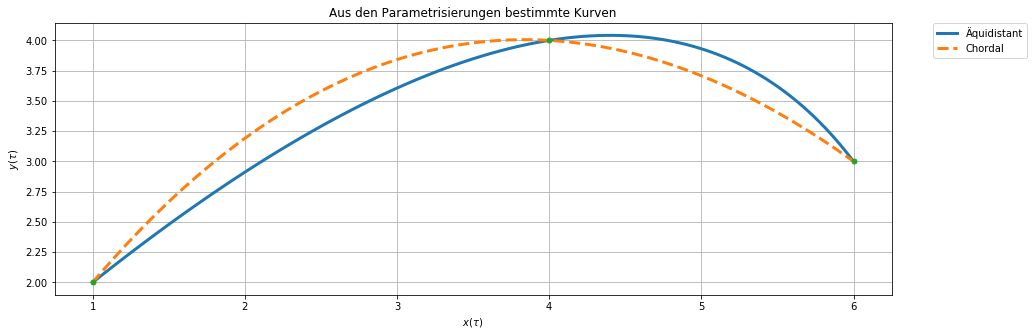

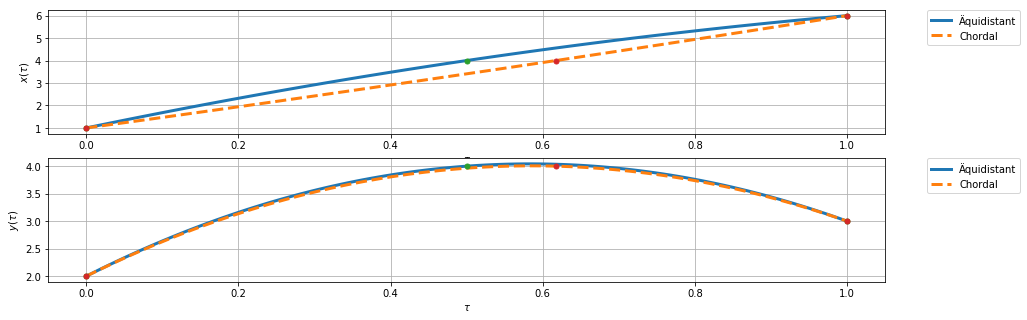

In [7]:
plt.rcParams['figure.figsize'] = (15,5)
# x-y Plot
fig, (ax) = plt.subplots();
ax.plot(f1[0,:], f1[1,:],label="Äquidistant",linewidth=3.0);
ax.plot(f2[0,:], f2[1,:],label="Chordal",linewidth=3.0,linestyle = '--');
ax.plot(P[:,0],P[:,1],marker='o',linestyle = 'None', markersize = 5)
ax.set(xlabel=r'$x(\tau)$', ylabel=r'$y(\tau)$',
       title='Aus den Parametrisierungen bestimmte Kurven')
ax.grid()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# tau-x Plot
fig, (ax2,ax3) = plt.subplots(2,1);
ax2.plot(tau, f1[0,:],label="Äquidistant",linewidth=3.0);
ax2.plot(tau, f2[0,:],label="Chordal",linewidth=3.0,linestyle = '--');
ax2.set(xlabel=r'$\tau$', ylabel=r'$x(\tau)$')
ax2.grid()
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.plot(Tau_equal,P[:,0],marker='o',linestyle = 'None', markersize = 5,linewidth=3.0)
ax2.plot(Tau_chordal,P[:,0],marker='o',linestyle = 'None', markersize = 5,linewidth=3.0)
# tau-y Plot
ax3.plot(tau, f1[1,:],label="Äquidistant",linewidth=3.0);
ax3.plot(tau, f2[1,:],label="Chordal",linewidth=3.0,linestyle = '--');
ax3.set(xlabel=r'$\tau$', ylabel=r'$y(\tau)$')
ax3.grid()
ax3.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax3.plot(Tau_equal,P[:,1],marker='o',linestyle = 'None', markersize = 5,linewidth=3.0)
ax3.plot(Tau_chordal,P[:,1],marker='o',linestyle = 'None', markersize = 5,linewidth=3.0)

# b

Die zeitliche Veränderung des Paramters $\tau(t)$ beschreibt die Bewegung entlang der Kurve $r(\tau(t))$. Die Geschwindigkeit in kartesischen Koordinaten ist durch die erste Ableitung der Bahn nach der Zeit gegeben.

$$
\begin{align}
\dot{r}\left(\tau\left(t\right)\right) = \frac{dr}{dt} = \frac{dr}{d\tau}\frac{d\tau}{dt} = \left[
\begin{array}{c}
a_1+2a_2\tau \\
b_1 + 2b_2\tau
\end{array}
\right]\dot{\tau}
\end{align}
$$

Die Bahngeschwindigkeit ist der Betrag des Geschwindigkeitsvektors $\dot{r}\left(\tau\left(t\right)\right)$.

$$
v_{Bahn}\left(\tau\right) = \sqrt{\dot{r}_x\left(\tau\left(t\right)\right)^2+\dot{r}_y\left(\tau\left(t\right)\right)^2}= \sqrt{\left(a_1+2a_2\tau\right)^2+\left(b_1+2b_2\tau\right)^2}\dot{\tau}
$$

# c)

Es müssen Trajektorien für $\dot{\tau}\left(t\right)$ und $\tau\left(t\right)$ geplant werden. Die Parameter müssen so bestimmt werden, dass die zuvor bestimmte Bahn innerhalb der vorgegebenen Transitionszeit $t_t=0.5$ abgefahren wird.

# 1. lineares Profil

$$\begin{align}
    \ddot{\tau}\left(t\right) = \left\{
    \begin{array}{ll}
        a & 0 < t \leq \frac{t_t}{2} \\
        -a &  \frac{t_t}{2}<t<t_t \\
    \end{array}
    \right. 
\end{align}$$

$$\begin{align}
    \dot{\tau}\left(t\right) = \int\!\ddot{\tau}\left(t\right)\, \mathrm{d}t =\left\{
    \begin{array}{ll}
        at +c_0& 0 < t \leq \frac{t_t}{2} \\
        -at +c_2&  \frac{t_t}{2}<t<t_t \\
    \end{array}
    \right. 
\end{align}$$

$$\begin{align}
    \tau\left(t\right) = \int\!\dot{\tau}\left(t\right)\, \mathrm{d}t = \left\{
    \begin{array}{ll}
        \frac{1}{2}at^2 + c_0t+c_1 & 0 < t \leq \frac{t_t}{2} \\
        -\frac{1}{2}at^2 + c_2t + c_3 &  \frac{t_t}{2}<t<t_t \\
    \end{array}
    \right. 
\end{align}$$

Die Koeffizienten $a,c_0,c_1,c_2$ und $c_3$ müssen so bestimmt werden, dass die Bahn innerhalb der vorgegebenen Transitionszeit $t_t=\frac{1}{2}$ abgefahren wird.

# Randbedingungen:

\begin{align}
    \dot{\tau}\left(0\right) = 0 = c_0 \quad &\rightarrow \quad c_0 = 0 \\
    \dot{\tau}\left(t_t\right) = 0 = -at_t + c_2 \quad &\rightarrow \quad c_2 = at_t \\
    \tau\left(0\right) = 0  = c_1 \quad &\rightarrow \quad c_1 = 0 \\
     \tau\left(t_t\right) = 1 = -\frac{1}{2}at_t^2 + c_2t_t + c_3 = -\frac{1}{2}at_t^2+at_t^2 +c_3  \quad &\rightarrow \quad c_3 = 1-\frac{1}{2}at_t^2 \\
     \text{Übergangsbedingung für } \tau=\frac{1}{2}t_t: \\
     \frac{1}{8}at_t^2-\left(-\frac{1}{8}at_t^2+c_2t_t+c_3\right) = 0 = \frac{1}{4}at_t^2-1 \quad &\rightarrow \quad a = \frac{4}{t_t^2}
\end{align}

# Parameter

\begin{align}
a = \frac{4}{t_t^2}, c_0 = 0, c_1 = 0, c-2 = \frac{4}{t_t}, c_3 = -1\\
a= 16, c_0 = 0, c_1 = 0, c_2 = 8, c_3 = -1
\end{align}


$$\begin{align}
    \dot{\tau}\left(t\right) = \left\{
    \begin{array}{ll}
        16t& 0  < t \leq \frac{1}{4} \\
        -16t +8&  \frac{1}{4}<t<\frac{1}{2} \\
    \end{array}
    \right. 
\end{align}$$

$$\begin{align}
    \tau\left(t\right) =  \left\{
    \begin{array}{ll}
        8t^2 & 0 < t \leq \frac{1}{5} \\
        -8t^2 + 8t -1 &  \frac{1}{4}<t<\frac{1}{2} \\
    \end{array}
    \right. 
\end{align}$$

In [8]:
# Zeit array für Auswertung des bestimmten Profils
t = np.linspace(0,0.5,num=1000);
# "Struct" für Trajektorien von Tau
Trajectory = collections.namedtuple('Trajectory', ['ddTau', 'dTau', 'Tau'])
# Funtion für Trajektorien von Tau für das lineare Profil
def fun_linear(t):  
    # Koeffizienten berechnen
    a = 4/(np.max(t)**2)
    c0 = 0
    c1 = 0   
    c2 = 4/(np.max(t))
    c3 = -1
    # Definitionsbereich 
    idx_l = [np.where((t >= 0) & (t <= np.max(t)/2))]
    idx_r = [np.where((t > np.max(t)/2) & (t <= np.max(t)))]
    # ddTau berechnen
    ddTau = np.zeros(np.size(t))
    ddTau[idx_l] = a
    ddTau[idx_r] = -a
    # dTau berechnen
    dTau = np.zeros(np.size(t))
    dTau[idx_l] = a*t[idx_l] + c0
    dTau[idx_r] = -a*t[idx_r] + c2
    # Tau berechnen
    Tau = np.zeros(np.size(t))
    Tau[idx_l] = 1/2*a*t[idx_l]**2 + c0*t[idx_l] + c1
    Tau[idx_r] = -1/2*a*t[idx_r]**2 + c2*t[idx_r] + c3
    # Alles in "Struct" speichern 
    Lin = Trajectory(ddTau = ddTau, dTau=dTau, Tau=Tau)
    return Lin
# Lineares Profil auswerten
LinearProfile = fun_linear(t)

# 2. Bestehorn Sinoide

$$
\begin{align*}
    \ddot{\tau}\left(t\right) = 2\pi a\sin{(2\pi bt)}
\end{align*}
$$

$$
\begin{align*}
    \dot{\tau}\left(t\right) =  \int\!\ddot{\tau}\left(t\right)\, \mathrm{d}t =  c_1-\frac{a}{b}\cos\left(2\pi bt\right)
\end{align*}
$$

$$
\begin{align*}
    \tau\left(t\right) =  \int\!\dot{\tau}\left(t\right)\, \mathrm{d}t =  c_1t+c_2-\frac{a}{2\pi b}\sin\left(2\pi bt\right)
\end{align*}
$$

# Randbedingungen: 

$$
\begin{align*}
    \dot{\tau}\left(0\right) = 0 = c_1 -\frac{a}{b} \quad &\rightarrow \quad a = c_1b \\
    \dot{\tau}\left(t_t\right) = 0 = c_1 -\frac{a}{b}\cos\left(2\pi bt_t\right) = c_1\left(1-\cos\left(2\pi bt_t\right)\right) \quad &\rightarrow \quad b=\frac{1}{t_t} \\
    \tau\left(0\right) = 0 = c_2 \quad &\rightarrow \quad c-2 = 0 \\
    \tau\left(t_t\right) = 1 = c_1t_t - \frac{a}{2\pi b^2}\sin\left(2\pi bt_t\right) = c_1t_t \quad &\rightarrow \quad c_1 = \frac{1}{t_t}
\end{align*}
$$

# Parameter:

$$
\begin{align}
a = \frac{1}{t_t^2},b = \frac{1}{t_t}, c_1 = \frac{1}{t_t}, c_2 = 0\\
a = 4, b = 2, c_1 = 2, c_2 = 0
\end{align}
$$


$$
\begin{align*}
    \dot{\tau}\left(t\right) =  2-2\cos\left(4\pi t\right)
\end{align*}
$$

$$
\begin{align*}
    \tau\left(t\right) =    2t-\frac{1}{\pi}\sin\left(4\pi t\right)
\end{align*}
$$

In [9]:
# Zeit array für Auswertung des bestimmten Profils
t = np.linspace(0,0.5,num=1000);
# Funtion für Trajektorien von Tau für das Bestehorn Profil
def fun_bestehorn(t):  
    # Koeffizienten berechnen
    a = 1/(np.max(t)**2)
    b = 1/(np.max(t))
    c1 = 1/(np.max(t))
    c2 = 0    
    # ddTau berechnen
    ddTau = 2*np.pi*a*np.sin(2*np.pi*b*t)
    # dTau berechnen
    dTau = c1-a/b*np.cos(2*np.pi*b*t);
    # Tau berechnen
    Tau = c1*t+c2-a/(2*np.pi*b**2)*np.sin(2*np.pi*b*t);
    # Alles in "Struct" speichern 
    Best = Trajectory(ddTau = ddTau, dTau=dTau, Tau=Tau)
    return Best
# Bestehorn Profil auswerten
BestehornProfile = fun_bestehorn(t)

# Berechnete Profile Plotten

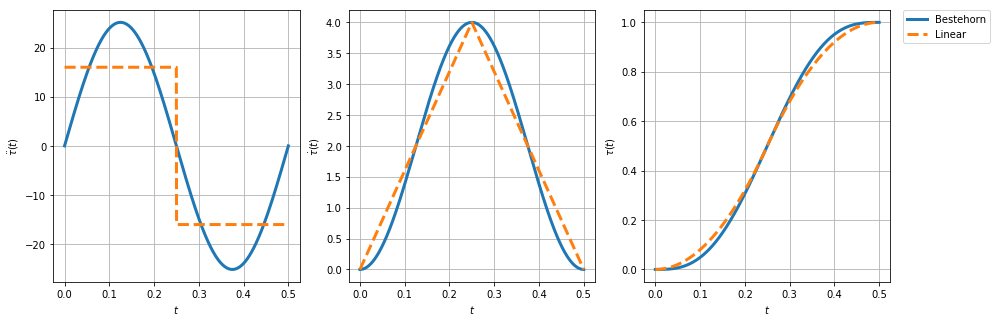

In [10]:
plt.rcParams['figure.figsize'] = (15,5)
# ddTau plotten
fig, (ax1,ax2,ax3) = plt.subplots(1,3);
ax1.plot(t,BestehornProfile.ddTau,linewidth=3.0)
ax1.plot(t,LinearProfile.ddTau,linewidth=3.0,linestyle = '--')
ax1.set(xlabel=r'$t$', ylabel=r'$\ddot{\tau}(t)$')
ax1.grid()
# dTau plotten
ax2.plot(t,BestehornProfile.dTau,linewidth=3.0)
ax2.plot(t,LinearProfile.dTau,linewidth=3.0,linestyle = '--')
ax2.set(xlabel=r'$t$', ylabel=r'$\dot{\tau}(t)$')
ax2.grid()
# Tau plotten
ax3.plot(t,BestehornProfile.Tau,label='Bestehorn',linewidth=3.0)
ax3.plot(t,LinearProfile.Tau,label='Linear',linewidth=3.0,linestyle = '--')
ax3.set(xlabel=r'$t$', ylabel=r'$\tau(t)$')
ax3.grid()
ax3.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Ergebnis
Die berechneten Profile werden in die bahngeschwindigkeit aus b) eingesetzt um die resultierenden Verläufe für die Bahngeschwindigkeit $v_{Bahn}$ zu berechnen. Ableiten der Bahngeschwindigkeit führt auf die Verläufe der Beschleunigung und des Rucks. In den unten dargetsellten Verläufen wird einerseit die bereits zuvor beschriebene Problematik der Parametrisierung als auch die der Wahl eines geeigneten Beschleunigungsprofils deutlich. Beide Profile Fahren die selbe Kurve in der Selben Zeit ab. Die verläufe sind jedoch sehr unterschiedlich. Bestehorn profil führt zu ruckbegrenzten Trajektorien, das linear Profil dagegen nicht. 

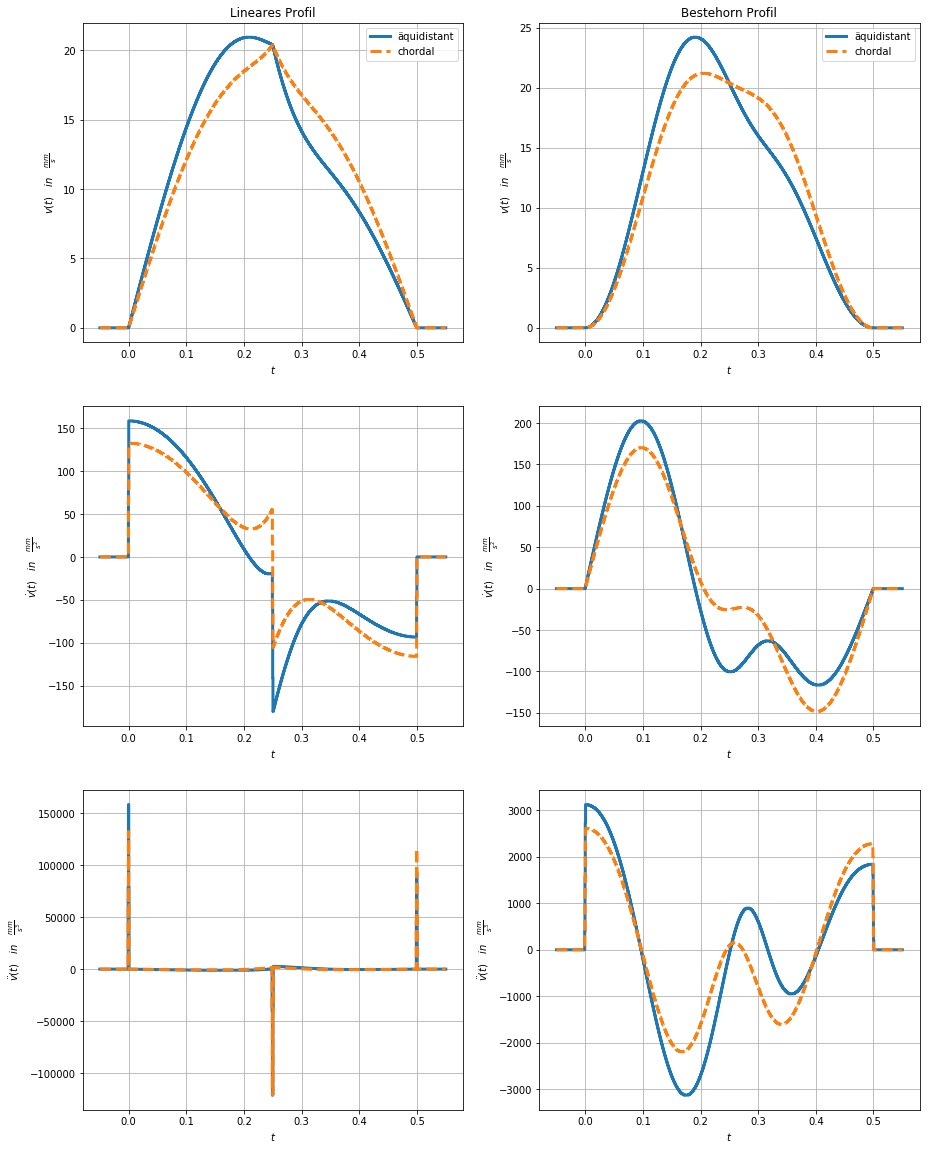

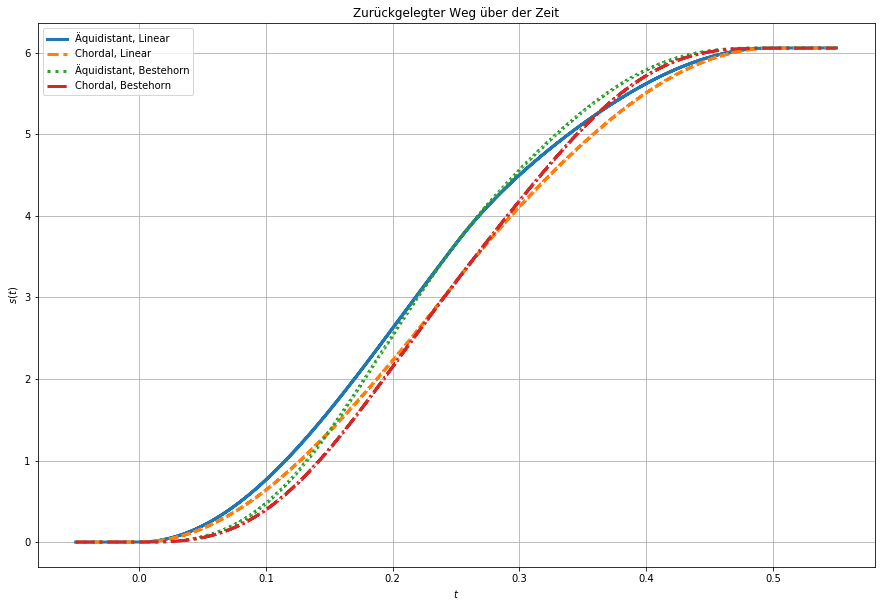

In [11]:
# Funktion für bahngeschwindigkeit
def vBahn(C,ddTau,dTau,Tau):
    vBahn = np.sqrt((C[0,1]+2*C[0,0]*Tau)**2 + (C[1,1]+2*C[1,0]*Tau)**2)*dTau
    return vBahn
# Erweiterung um den Rand vor und nach der Bewegung zu potten
steps = 100;
delta = t[1]-t[0]
prev = np.linspace(-steps*delta,-delta,steps)
after = np.linspace(delta,steps*delta,steps)+np.max(t)
# Zeit erweitern
t_ext = np.concatenate([prev,t,after])
# Linear
# Tau erweitern 
Tau_ext = np.concatenate([np.zeros(np.size(prev)),LinearProfile.Tau,np.ones(np.size(after))])
# dTau erweitern
dTau_ext = np.concatenate([np.zeros(np.size(prev)),LinearProfile.dTau,np.zeros(np.size(after))])
# ddTau erweitern
ddTau_ext = np.concatenate([np.zeros(np.size(prev)),LinearProfile.ddTau,np.zeros(np.size(after))])
# Lineare Trajektorien erweitern
LinearProfile_ext = Trajectory(ddTau = ddTau_ext, dTau = dTau_ext, Tau = Tau_ext)
# Bestehorn
# Tau erweitern 
Tau_ext = np.concatenate([np.zeros(np.size(prev)),BestehornProfile.Tau,np.ones(np.size(after))])
# dTau erweitern
dTau_ext = np.concatenate([np.zeros(np.size(prev)),BestehornProfile.dTau,np.zeros(np.size(after))])
# ddTau erweitern
ddTau_ext = np.concatenate([np.zeros(np.size(prev)),BestehornProfile.ddTau,np.zeros(np.size(after))])
# bestehorn Trajektorien erweitern
BestehornProfile_ext = Trajectory(ddTau = ddTau_ext, dTau = dTau_ext, Tau = Tau_ext)
# Berechnete Trajektorien differenzieren Äquidistant-linear
vBahn_equal_lin = vBahn(C_equal,LinearProfile_ext.ddTau, LinearProfile_ext.dTau, LinearProfile_ext.Tau)
dvBahn_equal_lin = np.gradient(vBahn_equal_lin,t_ext)
ddvBahn_equal_lin = np.gradient(dvBahn_equal_lin,t_ext)
# Berechnete Trajektorien differenzieren Chordal-linear
vBahn_equal_best = vBahn(C_equal,BestehornProfile_ext.ddTau, BestehornProfile_ext.dTau, BestehornProfile_ext.Tau)
dvBahn_equal_best = np.gradient(vBahn_equal_best,t_ext)
ddvBahn_equal_best = np.gradient(dvBahn_equal_best,t_ext)
# Berechnete Trajektorien differenzieren Äquidistant-Bestehorn
vBahn_chordal_lin = vBahn(C_chordal,LinearProfile_ext.ddTau, LinearProfile_ext.dTau, LinearProfile_ext.Tau)
dvBahn_chordal_lin = np.gradient(vBahn_chordal_lin,t_ext)
ddvBahn_chordal_lin = np.gradient(dvBahn_chordal_lin,t_ext)
# Berechnete Trajektorien differenzieren Chordal-Bestehorn
vBahn_chordal_best = vBahn(C_chordal,BestehornProfile_ext.ddTau, BestehornProfile_ext.dTau, BestehornProfile_ext.Tau)
dvBahn_chordal_best = np.gradient(vBahn_chordal_best,t_ext)
ddvBahn_chordal_best = np.gradient(dvBahn_chordal_best,t_ext)
# Plotten
plt.rcParams['figure.figsize'] = (15,20)
ax = plt.subplot(321)
plt.step(t_ext,vBahn_equal_lin, label = 'äquidistant',linewidth=3.0)
plt.step(t_ext,vBahn_chordal_lin, label = 'chordal',linewidth=3.0,linestyle = '--')
plt.grid()
ax.set(xlabel=r'$t$', ylabel=r'$v(t) \quad in \quad \frac{mm}{s}$', title='Lineares Profil')
ax.legend()

ax = plt.subplot(322)
plt.step(t_ext,vBahn_equal_best, label = 'äquidistant',linewidth=3.0)
plt.step(t_ext,vBahn_chordal_best, label = 'chordal',linewidth=3.0,linestyle = '--')
plt.grid()
ax.set(xlabel=r'$t$', ylabel=r'$v(t) \quad in \quad \frac{mm}{s}$', title='Bestehorn Profil')
ax.legend()

ax = plt.subplot(323)
plt.step(t_ext,dvBahn_equal_lin,linewidth=3.0)
plt.step(t_ext,dvBahn_chordal_lin,linewidth=3.0,linestyle = '--')
plt.grid()
ax.set(xlabel=r'$t$', ylabel=r'$\dot{v}(t) \quad in \quad \frac{mm}{s^2}$')

ax = plt.subplot(324)
plt.step(t_ext,dvBahn_equal_best,linewidth=3.0)
plt.step(t_ext,dvBahn_chordal_best,linewidth=3.0,linestyle = '--')
plt.grid()
ax.set(xlabel=r'$t$', ylabel=r'$\dot{v}(t) \quad in \quad \frac{mm}{s^2}$')

ax = plt.subplot(325)
plt.step(t_ext,ddvBahn_equal_lin,linewidth=3.0)
plt.step(t_ext,ddvBahn_chordal_lin,linewidth=3.0,linestyle = '--')
plt.grid()
ax.set(xlabel=r'$t$', ylabel=r'$\ddot{v}(t) \quad in \quad \frac{mm}{s^3}$')

ax = plt.subplot(326)
plt.step(t_ext,ddvBahn_equal_best,linewidth=3.0)
plt.step(t_ext,ddvBahn_chordal_best,linewidth=3.0,linestyle = '--')
plt.grid()
ax.set(xlabel=r'$t$', ylabel=r'$\ddot{v}(t) \quad in \quad \frac{mm}{s^3}$')

plt.rcParams['figure.figsize'] = (15,10)

fig,ax = plt.subplots()
s_e_l = np.cumsum(vBahn_equal_lin*delta);
s_c_l = np.cumsum(vBahn_chordal_lin*delta);
s_e_b = np.cumsum(vBahn_equal_best*delta);
s_c_b = np.cumsum(vBahn_chordal_best*delta);
plt.step(t_ext,s_e_l,label='Äquidistant, Linear',linewidth=3.0)
plt.step(t_ext,s_c_l,linestyle = '--',label='Chordal, Linear',linewidth=3.0)
plt.step(t_ext,s_e_b,linestyle = ':',label='Äquidistant, Bestehorn',linewidth=3.0)
plt.step(t_ext,s_c_b,linestyle = '-.',label='Chordal, Bestehorn',linewidth=3.0)
plt.grid()
ax.set(xlabel=r'$t$', ylabel=r'$s(t)$',title='Zurückgelegter Weg über der Zeit');
ax.legend()

    

# Aufgabe 3

Beim Abfahren der nachfolgend dargestellten Kontur muss die Bahngeschwindigkeit  aufgrund des dabei auftretenden Rucks im Segment-übergang reduziert werden. Um das Abfahren mit konstanter Bahngeschwindigkeit zu ermöglichen soll die Ecke mittels Polynom-überschleifen geglättet werden. Die Überschleifkurve soll die beiden Segmente Krümmungsstetig verbinden und eine Abweichung von$\delta=0.5$ mm vom Eigentlichen Segmentübergang aufweisen. Verwenden Sie eine Parametrisierung $\tau\in[0,1]$. Hinweis: Die Kontur beginnt am bei $(-1,0)$.

a)	Welcher Ordnung muss die Überschleifkurve sein, damit die geforderten Randbedingungen erfüllt werden?

b)	Wie lauten die Randbedingungen?

c)	Berechnen Sie die Koeffizienten der Überschleifkurve.

d)	Skizzieren Sie die berechnete Überschleifkurve in der Abbildung.

# Lösung 

# a) 

Es wird Stetigkeit bis zur 2. Ableitung (Krümmung) an beiden Rändern gefordert.  Um diese Randbedingungen zu formulieren sind insgesamt 6 Randbedingungen pro Koordinate notwendig. Ein Polynom n. Grades hat $(n+1)$ Parameter. Daher wird ein Polynom 5. Grades benötigt um di egeforderte Überschleifkurve zu bestimmen.

$$\begin{align*}
    r\left(\tau\right) = \left[
    \begin{array}{cc}
         r_x\left(\tau\right)  \\
         r_y\left(\tau\right) 
    \end{array}\right] = \left[
    \begin{array}{cc}
         a_0+a_1\tau+a_2\tau^2 + a_3\tau^3 + a_4\tau^4 + a_5\tau^5 \\
         b_0+b_1\tau+b_2\tau^2 + b_3\tau^3 + b_4\tau^4 + b_5\tau^5 
    \end{array}\right]
\end{align*}$$

# b)

Überschleifpunkte $P_v=\left[\begin{array}{cc}P_{v,x}&P_{v,y}\end{array}\right]^T$, $P_n=\left[\begin{array}{cc}P_{n,x}P_{n,y}\end{array}\right]^T$. 

Richtungsvektoren $T_v=\left[\begin{array}{cc}T_{v,x}&T_{v,y}\end{array}\right]^T$, $T_n=\left[\begin{array}{cc}T_{n,x}&T_{n,y}\end{array}\right]^T$. 

Krümmungsvektoren $K_v=\left[\begin{array}{cc}K_{v,x}&K_{v,y}\end{array}\right]^T$, $K_n=\left[\begin{array}{cc}K_{n,x}&K_{n,y}\end{array}\right]^T$. 

Parametrisierung: $\tau_0=0$, $\tau_1=1$.

# Randbedingungen:

$$
\begin{align}
r_x\left(\tau_0\right) = P_{v,x}, \quad r_y\left(\tau_0\right) = P_{v,y} \\
r_x\left(\tau_1\right) = P_{n,x}, \quad r_y\left(\tau_1\right) = P_{n,y} 
\end{align}
$$

$$
\begin{align}
\frac{dr_x}{d\tau}\left(\tau_0\right) = T_{v,x}, \quad \frac{dr_y}{d\tau}\left(\tau_0\right) = T_{v,y} \\
\frac{dr_x}{d\tau}\left(\tau_0\right) = T_{n,x}, \quad \frac{dr_y}{d\tau}\left(\tau_0\right) = T_{n,y} 
\end{align}
$$

$$
\begin{align}
\frac{d^2r_x}{d\tau^2}\left(\tau_0\right) = K_{v,x}, \quad \frac{d^2r_y}{d\tau^2}\left(\tau_0\right) = K_{v,y} \\
\frac{d^2r_x}{d\tau^2}\left(\tau_0\right) = K_{n,x}, \quad \frac{d^2r_y}{d\tau^2}\left(\tau_0\right) = K_{n,y} 
\end{align}
$$

# Überschleifpunkte $P_v$ und $P_n$

$$P_0 = \left[\begin{array}{cc}-1&0\end{array}\right],P_1 = \left[\begin{array}{cc}1&0\end{array}\right],P_2 = \left[\begin{array}{cc}1&2\end{array}\right]$$

In [12]:
P0 = np.array([-1,0])
P1 = np.array([1,0])
P2 = np.array([1,2])

P = np.array([P0,P1,P2])

Lineares Segment $S_{i,j} =\left(u\right) = \left(\frac{P_j-P_i}{\left|P_j-P_i\right|}\right)u + P_i$ vpn $P_i$ nach $P_j$. Die Überschleifpunkte sollen einen Abstand von $\delta=0.5$ mm haben.

$$ \delta_v = \left|P_1-P_0\right|-\delta$$
$$ \delta_n = \delta$$

$$P_v = S_{0,1}\left(\delta_v\right) = \left(\frac{P_1-P_0}{\left|P_1-P_0\right|}\right)\left(\left|P_1-P_0\right|-\delta\right)+P_0=\left(\frac{1}{2}\left[\begin{array}{c}2\\ 0\end{array}\right]\right)\left(2-\frac{1}{2}\right)+\left[\begin{array}{c}-1\\0\end{array}\right]=\left[\begin{array}{c}0.5\\0\end{array}\right] $$

$$P_n = S_{1,2}\left(\delta_n\right) = \left(\frac{P_2-P_1}{\left|P_2-P_1\right|}\right)\left(\left|P_2-P_1\right|-\delta\right)+P_1=\left(\frac{1}{2}\left[\begin{array}{c}0\\ 2\end{array}\right]\right)\frac{1}{2}+\left[\begin{array}{c}1\\0\end{array}\right]=\left[\begin{array}{c}1\\0.5\end{array}\right] $$

$$T_v = \frac{dS_{0,1}}{du}\left(\delta_v\right) =  \left(\frac{P_1-P_0}{\left|P_1-P_0\right|}\right) = \left[\begin{array}{c}1\\0\end{array}\right]$$

$$T_n = \frac{dS_{1,2}}{du}\left(\delta_n\right) =  \left(\frac{P_2-P_1}{\left|P_2-P_1\right|}\right) = \left[\begin{array}{c}0\\1\end{array}\right]$$

$$K_v = \frac{d^2S_{0,1}}{du^2}\left(\delta_v\right) = \left[\begin{array}{c}0\\0\end{array}\right]$$

$$K_n = \frac{d^2S_{1,2}}{du^2}\left(\delta_n\right) = \left[\begin{array}{c}0\\0\end{array}\right]$$

In [13]:
delta = 1/2;

delta1 = (la.norm(P1-P0)-delta)
delta2 = delta

Pv = (P1-P0)/(la.norm(P1-P0))*delta1+P0
Pn = (P2-P1)/(la.norm(P2-P1))*delta2+P1

Ps = np.array([Pv,Pn])

theta_v = (P1-P0)/la.norm(P1-P0)
theta_n = (P2-P1)/la.norm(P2-P1)

kappa_v = np.array([0,0])
kappa_n = np.array([0,0])

Tau0 = 0
Tau1 = 1

# Gleichungssystem aufstellen:

$$\begin{align*}
    r\left(\tau\right) =  \left[
    \begin{array}{cc}
         a_0+a_1\tau+a_2\tau^2 + a_3\tau^3 + a_4\tau^4 + a_5\tau^5 \\
         b_0+b_1\tau+b_2\tau^2 + b_3\tau^3 + b_4\tau^4 + b_5\tau^5 
    \end{array}\right]
\end{align*}$$

$$\begin{align*}
    \frac{dr}{d\tau}\left(\tau\right) = \left[
    \begin{array}{cc}
         a_1+2a_2\tau + 3a_3\tau^2 + 4a_4\tau^3 + 5a_5\tau^4 \\
         b_1+2b_2\tau + 3b_3\tau^2 + 4b_4\tau^3 + 5b_5\tau^4 
    \end{array}\right]
\end{align*}$$

$$\begin{align*}
    \frac{d^2r}{d\tau^2}\left(\tau\right) = \left[
    \begin{array}{cc}
         2a_2 + 6a_3\tau + 12a_4\tau^2 + 20a_5\tau^3 \\
         2b_2 + 6b_3\tau + 12b_4\tau^2 + 20b_5\tau^3 
    \end{array}\right]
\end{align*}$$

Randbedingungen einsetzen und als Matrixgleichung schreiben

$$TC=P$$

$$ 
\begin{align}
T = \left[
\begin{array}{cccccc}
\tau_0^0&\tau_0^1&\tau_0^2&\tau_0^3&\tau_0^4&\tau_0^5 \\
\tau_1^0&\tau_1^1&\tau_1^2&\tau_1^3&\tau_1^4&\tau_1^5 \\
0    &\tau_0^0&2\tau_0^1&3\tau_0^2&4\tau_0^3&5\tau_0^4 \\
0    &\tau_1^0&2\tau_1^1&3\tau_1^2&4\tau_1^3&5\tau_1^4 \\
0    &0       &2\tau_0^0&6\tau_0^1&12\tau_0^2&20\tau_0^3 \\
0    &0       &2\tau_1^0&6\tau_1^1&12\tau_1^2&20\tau_1^3 \\
\end{array}\right] = \left[
\begin{array}{cccccc}
1&0&0&0&0&0 \\
1&1&1&1&1&1 \\
0&1&0&0&0&0 \\
0&1&2&3&4&5 \\
0&0&2&0&0&0 \\
0&0&2&6&12&20 \\
\end{array}\right]
\end{align}
$$

$$
\begin{align}
    C = \left[
    \begin{array}{cccccc}
        a_0&a_1&a_2&a_3&a_4&a_5 \\
        b_0&b_1&b_2&b_3&b_4&b_5
    \end{array}\right]^T
\end{align}
$$

$$
\begin{align}
    C^T = \left[
    \begin{array}{cccccc}
        P_v&P_n&T_v&T_n&K_v&K_n
    \end{array}\right]^T
\end{align}
$$

In [14]:
A = np.array([[1,Tau0**1,Tau0**2,Tau0**3,Tau0**4,Tau0**5],
              [1,Tau1**1,Tau1**2,Tau1**3,Tau1**4,Tau1**5],
              [0,1,2*Tau0**1,3*Tau0**2,4*Tau0**3,5*Tau0**4],
              [0,1,2*Tau1**1,3*Tau1**2,4*Tau1**3,5*Tau1**4],
              [0,0,2,6*Tau0**1,12*Tau0**2,20*Tau0**3],
              [0,0,2,6*Tau1**1,12*Tau1**2,20*Tau1**3]])

B = np.array([Pv,Pn,theta_v,theta_n,kappa_v,kappa_n])

# Gleichungssystem Lösen

$$ C=T^{-1}P $$

$$
\begin{align}
    C^T = \left[
    \begin{array}{cccccc}
        0.5&1&0&-1&0.5&0 \\
        0&0&0&1&-0.5&0
    \end{array}\right]
\end{align}
$$

$$\begin{align*}
    r\left(\tau\right) =  \left[
    \begin{array}{c}
         \frac{1}{2} + \tau - \tau^3+\frac{1}{2}\tau^4  \\
         \tau^3-\frac{1}{2}\tau^4
    \end{array}\right]
\end{align*}$$

In [15]:
C = np.flip(np.transpose(np.dot(la.pinv(A),B)),1)

# Überschleifkurve Plotten

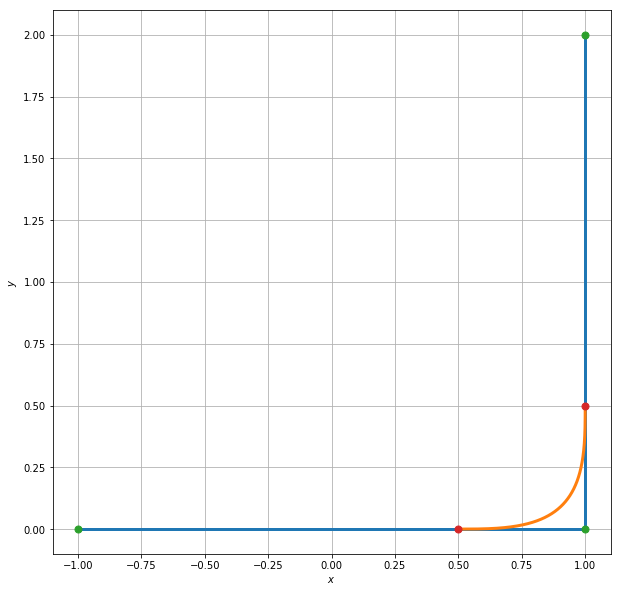

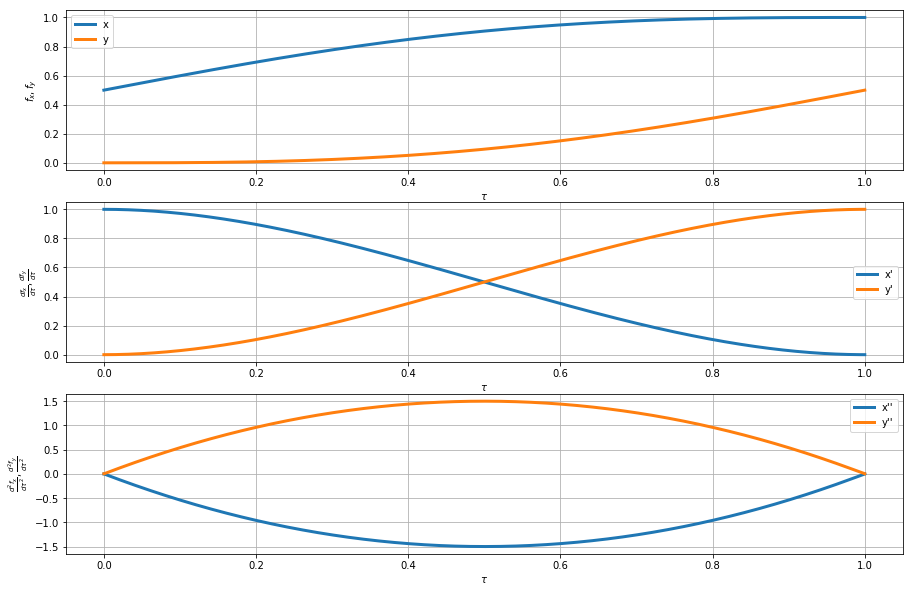

In [16]:
tau = np.linspace(0,1,num=1000)

f = np.array([np.polyval(C[0,:],tau),np.polyval(C[1,:],tau)])

plt.rcParams['figure.figsize'] = (10,10)
ax = plt.subplot(111)
ax.plot(P[:,0], P[:,1],linewidth=3.0,label="Kontur")
ax.plot(f[0,:], f[1,:],linewidth=3.0,label="Überschleifkurve")
ax.plot(P[:,0], P[:,1],linewidth=3.0,marker='o',linestyle = 'None', markersize = 7)
ax.plot(Ps[:,0], Ps[:,1],linewidth=3.0,marker='o',linestyle = 'None', markersize = 7)
ax.grid()
ax.set(xlabel=r'$x$', ylabel=r'$y$');

plt.rcParams['figure.figsize'] = (15,10)
fig, (ax1,ax2,ax3) = plt.subplots(3,1)
ax1.plot(tau, f[0,:],linewidth=3.0, label="x")
ax1.plot(tau, f[1,:],linewidth=3.0, label="y")
ax1.set(xlabel=r'$\tau$', ylabel=r'$f_x,f_y$');
ax1.grid()
ax1.legend()

ax2.plot(tau, np.gradient(f[0,:],tau),linewidth=3.0, label="x'")
ax2.plot(tau, np.gradient(f[1,:],tau),linewidth=3.0, label="y'")
ax2.set(xlabel=r'$\tau$', ylabel=r'$\frac{df_x}{d\tau},\frac{df_y}{d\tau}$');
ax2.grid()
ax2.legend()

ax3.plot(tau, np.gradient(np.gradient(f[0,:],tau),tau),linewidth=3.0, label="x''")
ax3.plot(tau, np.gradient(np.gradient(f[1,:],tau),tau),linewidth=3.0, label="y''")
ax3.set(xlabel=r'$\tau$', ylabel=r'$\frac{d^2f_x}{d\tau^2},\frac{d^2f_y}{d\tau^2}$');
ax3.grid()
ax3.legend()


# Aufgabe 4

Berechnen Sie mittels Hermite Interpolation das Polynom der Hermitischen Kurve zwischen den Punkten P1 und P2 in Parameterdarstellung.

# Lösung 

Kubischer Polynomspline in expliziter Darstellung zwischen $(k+1)=3$ Punkten. Es werden $k=2$ Poylnome gesucht.

$$f_i\left(x\right) = a_ix^3+b_ix^2+c_ix+d_i \quad i=1(1)k$$

Der kubische Polynomspline ist an den Übergangsstellen krümmungsstetig. Daher werden die 1. und 2. Ableitung für die Bestimmungsgleichungen benötigt.

$$\frac{df_i}{dx}=3a_ix^2+2b_ix+c_i$$

$$\frac{d^2f_i}{dx^2}=6a_ix+2b_i$$

# Randbedingungen 

$$
\begin{align}
f_1\left(P_{0,x}\right) = P_{0,y} \quad f_1\left(P_{1,x}\right) = P_{1,y} \\
f_2\left(P_{1,x}\right) = P_{1,y} \quad f_2\left(P_{2,x}\right) = P_{2,y} \\
\end{align}
$$

Stetigkeitsbedingungen für richtungs- und krümmungsstetigen Übergang zwischen $f_1$ und $f_2$

$$
\begin{align}
\frac{df_1}{dx}\left(P_{1,x}\right) = \frac{df_2}{dx}\left(P_{1,x}\right) \quad \frac{d^2f_1}{dx^2}\left(P_{1,x}\right) = \frac{d^2f_2}{dx^2}\left(P_{1,x}\right) \\
\end{align}
$$

Randbedingungen für natürlichen kubischen Spline

$$
\begin{align}
\frac{d^2f_1}{dx^2}\left(P_{0,x}\right)= 0\quad \frac{d^2f_2}{dx^2}\left(P_{2,x}\right) = 0\\
\end{align}
$$

# Gleichungssystem aufstellen 

$$
XC=R 
$$

$$
\begin{align}
\left(
\begin{array}{cccccccc}
x_0^3 & x_0^2 & x_0 & 1   &  0     & 0     & 0   & 0 \\
x_1^3 & x_1^2 & x_1 & 1   &  0     & 0     & 0   & 0 \\
0     & 0     & 0   & 0   &  x_1^3 & x_1^2 & x_1 & 1 \\
0     & 0     & 0   & 0   &  x_2^3 & x_2^2 & x_2 & 1 \\
3x_1^2& 2x_1  & 1   & 0   &-3x_1^2 & -2x_1 & -1  & 0 \\
6x_1  & 2     & 0   & 0   &-6x_1   & -2    &  0  & 0 \\
6x_0  & 2     & 0   & 0   & 0      &  0    &  0  & 0 \\
0     & 0     & 0   & 0   & 6x_3   &  2    &  0  & 0     
\end{array}\right)
\left(
\begin{array}{c}
a_1\\ b_1 \\ c_1 \\ d_1\\ a_2 \\ b_2 \\ c_2 \\ d_2
\end{array}
\right) = \left(
\begin{array}{c}
y_0\\ y_1 \\ y_1 \\ y_2 \\ 0 \\ 0 \\ 0 \\ 0
\end{array}\right)
\end{align}
$$

$$C=X^{-1}R$$

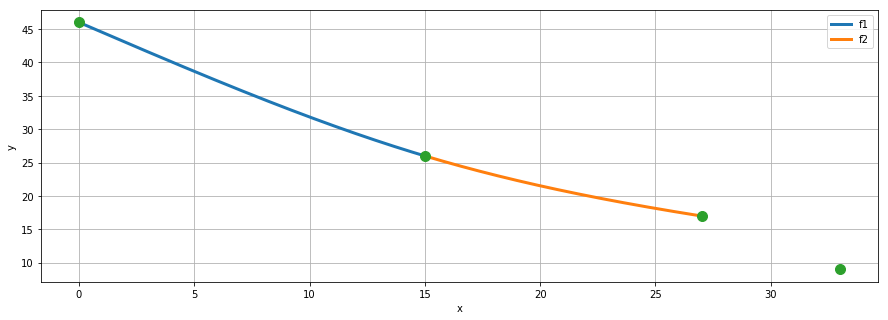

In [17]:
P0 = np.array([0,46])
P1 = np.array([15,26])
P2 = np.array([27,17])
P3 = np.array([33,9])

P =np.array([P0,P1,P2,P3])

X = np.array([[P0[0]**3,P0[0]**2,P0[0],1,0,0,0,0],
             [P1[0]**3,P1[0]**2,P1[0],1,0,0,0,0],
             [0,0,0,0,P1[0]**3,P1[0]**2,P1[0],1],
             [0,0,0,0,P2[0]**3,P2[0]**2,P2[0],1],
             [3*P1[0]**2,2*P1[0],1,0,-3*P1[0]**2,-2*P1[0],-1,0],
             [6*P1[0],2,0,0,-6*P1[0],-2,0,0],
             [6*P0[0],2,0,0,0,0,0,0],
             [0,0,0,0,6*P3[0],2,0,0]])


R = np.array([[P0[1]],[P1[1]],[P1[1]],[P2[1]],[0],[0],[0],[0]])


C = np.dot(la.pinv(X),R)

C1 = C[0:4]
C2 = C[4:9]

x1 = np.linspace(P0[0],P1[0],250)
f1 = np.polyval(C1,x1)

x2 = np.linspace(P1[0],P2[0],250)
f2 = np.polyval(C2,x2)

plt.rcParams['figure.figsize'] = (15,5)

fig, ax = plt.subplots()
ax.plot(x1,f1,linewidth='3',label='f1')
ax.plot(x2,f2,linewidth='3',label='f2')
ax.plot(P[:,0],P[:,1],linestyle='none',marker='o',markersize = 10)
ax.set(xlabel="x",ylabel="y")
ax.grid()
ax.legend()

# Aufgabe 5

Berechnen Sie mittels Hermite Interpolation das Polynom der Hermitischen Kurve zwischen den Punkten $P_1$ und $P_2$ in Parameterdarstellung.

# Lösung:

Tangentensteigungen sind bereits gegeben, sonst müssten diese zunächst berechnet werden. Parameter $\tau=f\left(u\right), u\in\left[x_k,x_{k+1}\right]$

$$ \tau = \frac{u-x_k}{x_{k+1}-x_k} \quad \in \left[0,1\right] $$

$$s_k\left(\tau\right) = h_{10}\left(\tau\right)p_{k+1}+h_{00}\left(\tau\right)p_{k}+h_{11}\left(\tau\right)m_{k+1}+h_{01}\left(\tau\right)m_{k}$$

mit den hermitischen Polynomen

$$
\begin{align}
&h_{00}\left(\tau\right) = 2\tau^3-3\tau^2+1 \qquad &h_{10}\left(\tau\right) = -2\tau^3+3\tau^2 \\
&h_{01}\left(\tau\right) = \tau^3-2\tau^2+\tau \qquad &h_{11}\left(\tau\right) = \tau^3-\tau^2
\end{align}
$$

nach Einsetzen folgt für $k=1$:

$$
\begin{align}
s_1\left(\tau\right) &= h_{10}\left(\tau\right)\left[\begin{array}{c}4\\5\end{array}\right] + h_{00}\left(\tau\right)\left[\begin{array}{c}2\\4\end{array}\right] + h_{11}\left(\tau\right)\left[\begin{array}{c}1\\0\end{array}\right] + h_{01}\left(\tau\right)\left[\begin{array}{c}1\\1\end{array}\right] \\ 
&= \left(-2\tau^3+3\tau^2\right)\left(\tau\right)\left[\begin{array}{c}4\\5\end{array}\right] + \left(2\tau^3-3\tau^2+1\right)\left(\tau\right)\left[\begin{array}{c}2\\4\end{array}\right] + \left(\tau^3-\tau^2\right)\left(\tau\right)\left[\begin{array}{c}1\\0\end{array}\right] + \left(\tau^3-2\tau^2+\tau\right)\left(\tau\right)\left[\begin{array}{c}1\\1\end{array}\right] \\
&= \left[
\begin{array}{c}
-2\tau^3+3\tau^2+\tau+2 \\
-\tau^3+\tau^2+\tau+4
\end{array}\right]
\end{align}
$$ 

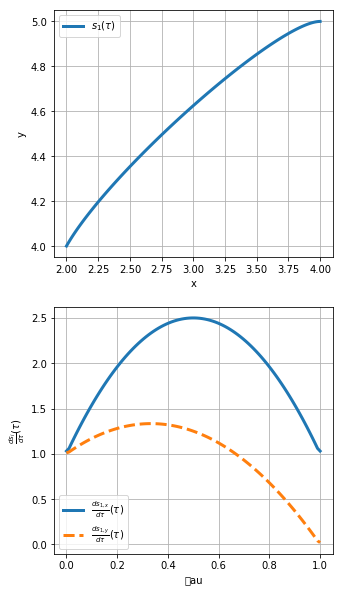

In [18]:
# Koeffizienten Matrix 
C = np.array([[-2,3,1,2],[-1,1,1,4]]);
# Parameter array
tau = np.linspace(0,1,num=100);
# Kurve auswerten
f = np.array([np.polyval(C[0,:],tau),np.polyval(C[1,:],tau)])
# Kurve Plotten
plt.rcParams['figure.figsize'] = (5,10)
ax = plt.subplot(211)
plt.plot(f[0,:],f[1,:], label=r'$s_1(\tau)$',linewidth=3)
ax.set(xlabel='x', ylabel='y')
plt.legend()
plt.grid()
ax = plt.subplot(212)
plt.plot(tau,np.gradient(f[0,:],tau),linewidth=3,linestyle='-', label=r'$\frac{ds_{1,x}}{d\tau}(\tau)$')
plt.plot(tau,np.gradient(f[1,:],tau),linewidth=3,linestyle='--', label=r'$\frac{ds_{1,y}}{d\tau}(\tau)$')
ax.set(xlabel='\tau', ylabel=r'$\frac{ds_{i}}{d\tau}(\tau)$')
plt.legend()
plt.grid()

# Aufgabe 6

Bestimmen Sie für die gegebene Punktmenge die Polynomkoeffizienten des ersten Polynoms nach dem Akima-Verfahren. Zur Parametrisierung der Funktion soll eine chordale Parametrisierung verwendet werden.

# Lösung

Es ist ein Polynom 3. Grades zu bestimmen. Dazu müssen 4 Randbedingungen aufgestellt werden. Das Polynom in Parameterdarstellung hat folgende Form:

$$\begin{align*}
    r\left(\tau\right) = \left[
    \begin{array}{cc} 
    x\left(u\right) \\
    y\left(u\right)
    \end{array}\right]
    =  \left[
    \begin{array}{cc}
         a_xu^3 +b_xu^2 +c_xu +d_x \\
         a_yu^3 +b_yu^2 +c_yu +d_y \\
    \end{array}\right]
\end{align*}$$

Die Randbedingungen zur Bestimmung der Polynomkoeffizienten lauten:

$$
\begin{align}
    f\left(u_0\right) = P_0, \quad
    \frac{df}{du}\left(u_0\right) = S_0 \\
    f\left(u_1\right) = P_0, \quad
    \frac{df}{du}\left(u_1\right) = S_1 
\end{align}
$$

Hierbe bezeichnen $S_i$ Tangentenvektoren an den Stellen $u_i$. Der Parameter u berechnet sich durch chordale Parametrierung mit Normierungsfaktor $s=1$ zu

$$u_0 = 0, u_1 = 25, u_2 = 40, u3 = 50$$

Die benötigte Sehnensteigungen für die Tangenten im Start- und Endpunkt berechnen sich allgemein mit $dq_i=\frac{y_{i+1}-y_i}{x_{i+1}-x_i}$. In der Parameterform gilt für jede Koordinate $dq_i=\frac{x_{i+1}-x_i}{u_{i+1}-u_i}$ bzw. $dq_i=\frac{y_{i+1}-y_i}{u_{i+1}-u_i}$. An den Rändern gilt $dq_{-1} = 2d_0-dq_1, \quad dq_{-2} = 2d_{-1}-dq_0$.

Daraus ergeben sich folgende Sehnensteigungen:

$$ 
\begin{align}
dq_{-2,x} = \frac{1}{5} \quad dq_{-2,y} = -\frac{6}{5} \\
dq_{-1,x} = \frac{2}{5} \quad dq_{-1,y} = -1 \\
dq_{0,x} = \frac{3}{5} \quad dq_{0,y} = -\frac{4}{5} \\
dq_{1,x} = \frac{4}{5} \quad dq_{1,y} = -\frac{3}{5} \\
dq_{2,x} = \frac{3}{5} \quad dq_{2,y} = -\frac{4}{5} \\
\end{align}
$$

Die gesuchten Tangentensteigungen werden mit der Akima Formel berechnet

$$
s_k = \frac{dq_{k-1}\left|dq_{k+1}-dq_{k}\right|+dq_{k}\left|dq_{k-1}-dq_{k-2}\right|}{\left|dq_{k+1}-dq_{k}\right|+\left|dq_{k-1}-dq_{k-2}\right|}
$$

$$ s_0 = \left[\begin{array}{c}0.5\\-0.9\end{array}\right], \quad s_1 = \left[\begin{array}{c}0.7\\-0.7\end{array}\right] $$

Die Randbedingungen

$$
\begin{align}
    f\left(u_0\right) = \left[\begin{array}{c}0\\46\end{array}\right], \quad
    \frac{df}{du}\left(u_0\right) = \left[\begin{array}{c}0.5\\-0.9\end{array}\right] \\
    f\left(u_1\right) = \left[\begin{array}{c}15\\26\end{array}\right], \quad
    \frac{df}{du}\left(u_1\right) = \left[\begin{array}{c}0.7\\-0.7\end{array}\right] 
\end{align}
$$

führen auf das Gleichungssystem zur Bestimmung der Koeffizienten

# Aufgabe 7

Die unten dargestellte Stützpunktfolge soll mittels eines Béziersplines interpoliert werden. Bestimmen Sie hierfür für die 3 Punkte die Gewichtungsfunktionen vom Grad n=2.
Approximieren Sie danach den Bezierspline c(u) und berechnen Sie den Bezierspline für $u_0=0$, $u_1=\frac{1}{2}$ und $u_2=1$.
Zeichnen Sie den Bezierspline dann in das nachfolgende Schaubild ein.

# Lösung

$$
c\left(u\right) = \sum_{k=0}^nP_kB_{k,n}, \quad u\in\left[0,1\right]
$$
 
$$B_{k,n} = \left(\begin{array}{c}n\\k\end{array}\right)u^k\left(1-u\right)^{n-k}, \quad \left(\begin{array}{c}n\\k\end{array}\right) = \frac{n!}{k!\left(n-k\right)!}$$

# Gewichtungsfunktionen

$$B_{0,2} = \left(\begin{array}{c}2\\0\end{array}\right)u^0\left(1-u\right)^2 = \left(1-u\right)^2$$
$$B_{1,2} = \left(\begin{array}{c}2\\1\end{array}\right)u^1\left(1-u\right)^1 = 2\left(u-u^2\right)$$
$$B_{2,2} = \left(\begin{array}{c}2\\2\end{array}\right)u^2\left(1-u\right)^0 = u^2$$

# Bezierspline

$$
c\left(u\right) = \left[\begin{array}{c}1\\1\end{array}\right]\left(1-u\right)^2+\left[\begin{array}{c}4\\4\end{array}\right]2\left(u-u^2\right) + \left[\begin{array}{c}6\\2\end{array}\right]u^2
$$

$$
c\left(u\right) = \left[\begin{array}{c}1+6u-u^2\\1+6u-5u^2\end{array}\right]
$$

# Funktionswerte 

für $u_0=0$, $u_1=\frac{1}{2}$ und $u_2=1$

$$ c\left(0\right) = \left[\begin{array}{c}1\\1\end{array}\right], \quad c\left(\frac{1}{2}\right) = \left[\begin{array}{c}3.75\\2.75\end{array}\right], \quad c\left(1\right) = \left[\begin{array}{c}6\\2\end{array}\right]$$

In [19]:
# benötigte Punkte programmieren
P0 = np.array([1,1])
P1 = np.array([4,4])
P2 = np.array([6,2])
P = np.array([P0,P1,P2])
# Parameter u erzeugen
u = np.linspace(0,1,100)
# c(u) berechnen
c = np.array([[1],[1]])+np.array([[6],[6]])*u+np.array([[-1],[-5]])*u**2
# Plotten
plt.rcParams['figure.figsize'] = (10,10)
def f(u1):
    ce = np.array([[1],[1]])+np.array([[6],[6]])*u1+np.array([[-1],[-5]])*u1**2
    Pe = np.array([u1*(P1-P0)+P0,u1*(P2-P1)+P1])
    fig, ax = plt.subplots();
    plt.plot(c[0,:],c[1,:],linewidth=3)
    plt.plot(P[:,0],P[:,1],marker='o',markersize='10',linestyle='--',linewidth=3)
    plt.plot(Pe[:,0],Pe[:,1],marker='o',markersize='10',linestyle='--',linewidth=3)
    plt.plot(ce[0],ce[1],marker='o',markersize='10',linestyle='--',linewidth=3)
    ax.set(xlabel='x', ylabel='y')
    plt.grid()
    return 
# Slider für 
interact(f, u1=(0.0,1,0.01));

interactive(children=(FloatSlider(value=0.5, description='u1', max=1.0, step=0.01), Output()), _dom_classes=('…